In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import datasets
from umap import UMAP
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import spectral_embedding
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

In [2]:
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target

In [3]:
n_neighbors = 10
n_clusters = 15
n_components = n_clusters

In [4]:
%%time
neigh = NearestNeighbors(n_neighbors=n_neighbors)
neigh.fit(X)
gamma = 1./X.shape[1]
distances = neigh.kneighbors_graph(X)
distances.data = distances.data ** 2
distances.data *= -gamma
np.exp(distances.data, distances.data)
distances = 0.5 * (distances + distances.transpose())
embedding = spectral_embedding(distances,
                       n_components=n_components)
kmeans = KMeans(n_clusters=n_clusters)
labels = kmeans.fit_predict(embedding)

CPU times: user 625 ms, sys: 240 ms, total: 865 ms
Wall time: 438 ms


In [5]:
confusion_matrix(labels, y)[:, :10]

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,  10,   6,   1,   0,   1,   0, 165,   4],
       [  0,   0,   1,   2,   3,   0,   0, 179,   0,   8],
       [  0,   0,   0,   1,   0, 110,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   1,   0,   0,   0, 143],
       [  0,   0,   0,   0, 111,   0,   0,   0,   0,   0],
       [  0,   0, 115,   0,   0,   0,   0,   0,   0,   0],
       [  0,  99,   0,   0,   0,   0,   0,   0,   5,   0],
       [  0,   0,   0,   0,   0,   1, 180,   0,   0,   0],
       [  0,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  56,   0,   0,   0,   0,   0,   0,   3,  21],
       [  0,   0,   0,   0,   0,  70,   0,   0,   0,   2],
       [  0,   0,   0,   0,  66,   0,   0,   0,   0,   0],
       [  0,   0,  51,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 174,   0,   0,   0,   0,   1,   2]])

In [6]:
%%time
umap = UMAP()
Y = umap.fit_transform(X)

CPU times: user 4.45 s, sys: 271 ms, total: 4.72 s
Wall time: 4.22 s


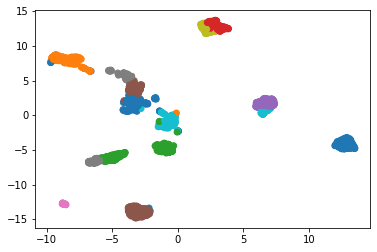

In [7]:
plt.scatter(Y[:,0], Y[:,1], c=labels, cmap="tab10")

In [8]:
idx = 3

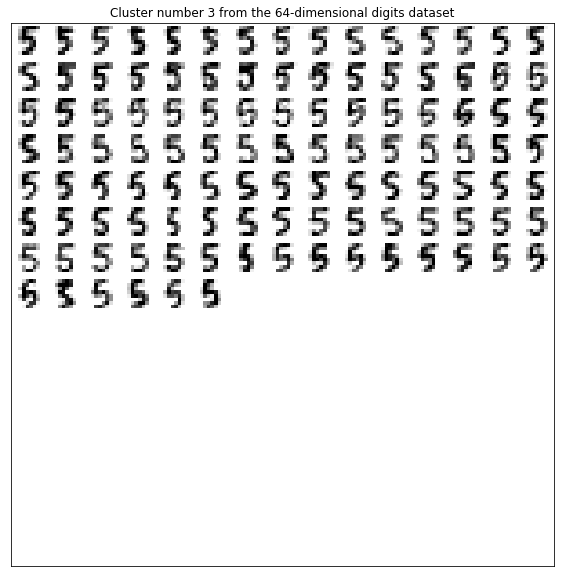

In [9]:
# Plot images of the digits
plt.figure(figsize=(10,10))
sample = labels == idx
n_img_per_row = 15
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):        
        if i * n_img_per_row + j >= sum(sample):
            continue
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[sample][i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('Cluster number {:d} from the 64-dimensional digits dataset'.format(idx));

